### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

## Москва 2022
***

## Вариант №17


### Задание 1
Загрузите из набора данных ‘diamonds’ следующие признаки:  features/carat, features/table, features/z

Активируем последние версии наборов данных и подключаем модуль Tensorflow Datasets, который содержит необходимый нам набор 'diamonds'

In [ ]:
!pip install -q tfds-nightly
import tensorflow_datasets as tfds

     |████████████████████████████████| 4.3 MB 5.1 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 


Считываем из TFDS набор данных Бриллианты:

In [ ]:
ds = tfds.load('diamonds', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/diamonds/1.0.0.incompleteSFVJRV/diamonds-train.tfrecord*...:   0%|          | …

Dataset diamonds downloaded and prepared to ~/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


Преобразовываем объект PrefetchDataset в датафрейм:

In [ ]:
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Отделим от полного набора данных признаки features/carat, features/table и features/z

In [ ]:
df = df.get(["features/carat", "features/table", "features/z"])
df.head()

,features/carat,features/table,features/z
0,1.26,60.0,4.23
1,0.80,54.0,3.71
2,0.56,54.0,3.27
3,1.51,58.0,4.64
4,0.33,54.0,2.76


### Задание 2
Определите признак с минимальным квантилем уровня 0.8 и постройте диаграмму размаха значений признака.

*Квантиль в математической статистике* — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.  
Найдем значения квантилей уровня 0.8 для всех признаков.

In [ ]:
q = df.quantile(0.8)
q

features/carat     1.13
features/table    59.00
features/z         4.13
Name: 0.8, dtype: float64

Определим признак с наименьшим значением квантиля.

In [ ]:
feature1 = q.idxmin()
feature1

'features/carat'

Построим диаграмму размаха значений признака.

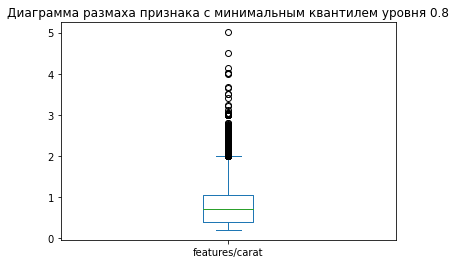

In [ ]:
df[feature1].plot.box(title='Диаграмма размаха признака с минимальным квантилем уровня 0.8');

### Задание 3
Для признака, имеющего минимальную медиану, постройте и визуализируйте эмпирическую функцию распределения.

*Медиана* - такое число, что половина из элементов набора не меньше него, а другая половина не больше.  
Найдем медианы каждого признака.

In [ ]:
m = df.median()
m

features/carat     0.70
features/table    57.00
features/z         3.53
dtype: float32

Определим признак с минимальным значением медианы.

In [ ]:
feature2 = m.idxmin()
feature2

'features/carat'

Пусть рассматривается числовой признак $X$, принимающий значения $x_{i},i=\overline{1,n}.$

Тогда *эмпирическая (кумулятивная) функция распределения* (CDF) в точке $x$ задается как сумма относительных частот для всех элементов выборки $\{x_{i}\}$, меньше или равных $x$:

$\hat{F}(x)=\frac{1}{n}\;\sum_{i=1}^{n}I\left(x_{i}\leqslant x\right)$,

где индикаторная переменная $I$ принимает значение $1$, когда указанное в качестве аргумента условие выполняется, или $0$ в противном случае. Для каждой точки $x_{i}$ используется одинаковая относительная частотв (коэффициент) $\frac{1}{n}$.

Визуализируем эмпирическую функцию распределения нашего признака.

Создадим функцию, отражающую, какая часть из всех значений признака не превосходит, некоторое значение на оси x.

In [ ]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

Определим списки значений осей x и y

In [ ]:
samples = df[feature2]
npoints = 500
dx = (samples.max()-samples.min())/npoints  # шаг

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

Преобразуем списки в DataFrame для отрисовки графика с помощью Pandas

In [ ]:
import pandas as pd
df_ECDF = pd.DataFrame(ylist, columns=[feature2], index=xlist)
df_ECDF

,features/carat
0.20000,0.000222
0.20962,0.000222
0.21924,0.000389
0.22886,0.000482
0.23848,0.005914
...,...
4.96190,0.999981
4.97152,0.999981
4.98114,0.999981
4.99076,0.999981


Нарисуем график функции распределения.

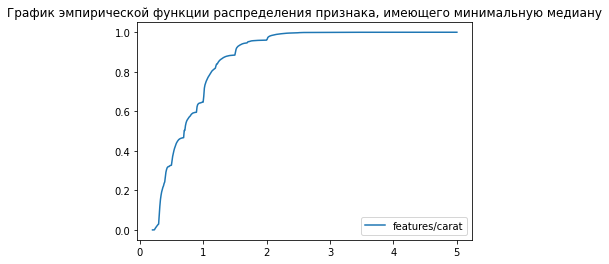

In [ ]:
df_ECDF.plot.line(title='График эмпирической функции распределения признака, имеющего минимальную медиану');

### Задание 4
Вычислите матрицу ковариации признаков и для пары признаков с наиболее высокой ковариацией постройте диаграмму рассеяния.

*Ковариация* — это мера линейной зависимости двух случайных величин.

In [ ]:
c = df.cov()
c

,features/carat,features/table,features/z
features/carat,0.224687,0.192365,0.318917
features/table,0.192365,4.992948,0.237996
features/z,0.318917,0.237996,0.498011


In [ ]:
import numpy as np
array = c.to_numpy()
max = 0
length = len(array)
for i in range(length-1):
  for j in range(i+1, length):
    if (array[i][j] > max):
      max = array[i][j]
max

0.3189168364220816

*Диаграмма рассеяния* изображает значения двух переменных в виде точек на плоскости.

Построим диаграмму рассеяния для признаков с наибольшей ковариацией.

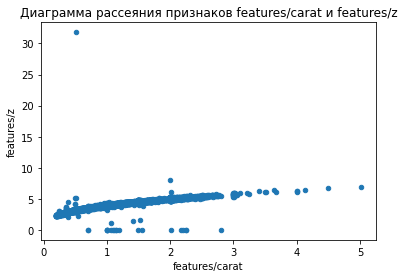

In [ ]:
df.plot.scatter('features/carat', 'features/z', title='Диаграмма рассеяния признаков features/carat и features/z');